### **Taller 4 -  Segmentación de Imágenes**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**1. Segmentación por similitud, división y mezcla de regiones**

In [311]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

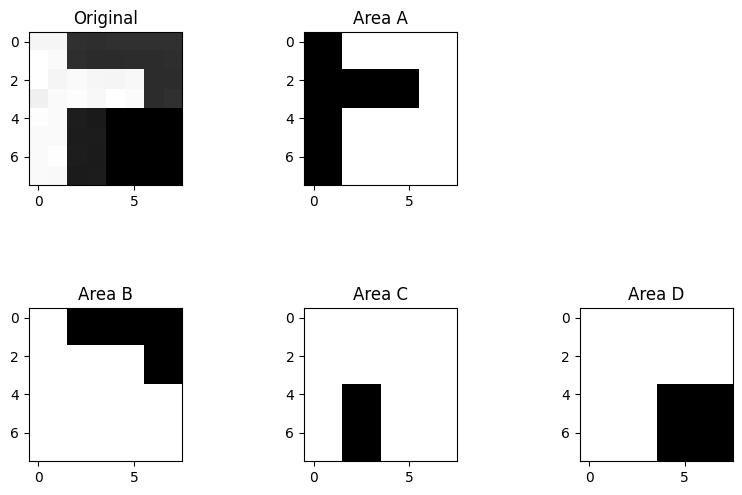

In [312]:
def std (matriz): #Desviación de una matriz nxm
    data = []
    for row in matriz:
        data = np.concatenate((data, row))
    return np.std(data)

def areaSquare (array, position, new, des): #Division de una matriz nxn a criterio de la desviación estandar
    n = len(array)//2
    posiciones = [(0, 0), (0, n), (n, 0), (n, n)]
    for pos in posiciones:
        i, j = pos
        values = array[i:i+n, j:j+n]
        matrizP = position[i:i+n, j:j+n]
        if std(values) > des:
            areaSquare(values, matrizP, new, des)
        else:
            new.append([values.tolist(), matrizP.tolist(), std(values)])
    return new

def areas(array, idx,des): #Mezcla de areas
    ans = array[idx]
    passNeigh = []
    end = False
    while not(end):
        values = ans[1]
        lastNeigh = ans[4]
        for neigh in lastNeigh:
            slc2 = array[neigh]
            newDes = std(values + slc2[1])
            newNeigh = lastNeigh
            if not(array[neigh][5]) and newDes < des:
                newNeigh = [x for x in ans[4] + slc2[4] if x not in [ans[0], slc2[0]]]
                ans = [ans[0], ans[1] + slc2[1], ans[2] + slc2[2], des, newNeigh]
                array[neigh][5] = True
        if newNeigh == lastNeigh:
            end = True
    return ans

def organize(array, n): #Función para visualizar las areas
    matriz = np.full((n, n), 255)
    for row in array[2]:
        for pos in row:
            x, y = pos
            matriz[x, y] = 0
    return matriz
            

test = np.array([[245, 245, 49, 46, 49, 48, 49, 49], #Matriz de colores BYN
                 [255, 250, 46, 43, 43, 45, 44, 46],
                 [255, 245, 250, 246, 245, 248, 44, 45],
                 [240, 250, 253, 248, 255, 251, 44, 48],
                 [253, 250, 29, 26, 0, 0, 0, 0],
                 [250, 250, 28, 28, 0, 0, 0, 0],
                 [250, 254, 29, 27, 0, 0, 0, 0],
                 [250, 249, 27, 28, 0, 0, 0, 0]],dtype='uint8')

pos = np.array([[[0,0], [0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [0,7]], #Posiciones asociadas
                [[1,0], [1,1], [1,2], [1,3], [1,4], [1,5], [1,6], [1,7]],
                [[2,0], [2,1], [2,2], [2,3], [2,4], [2,5], [2,6], [2,7]],
                [[3,0], [3,1], [3,2], [3,3], [3,4], [3,5], [3,6], [3,7]],
                [[4,0], [4,1], [4,2], [4,3], [4,4], [4,5], [4,6], [4,7]],
                [[5,0], [5,1], [5,2], [5,3], [5,4], [5,5], [5,6], [5,7]],
                [[6,0], [6,1], [6,2], [6,3], [6,4], [6,5], [6,6], [6,7]],
                [[7,0], [7,1], [7,2], [7,3], [7,4], [7,5], [7,6], [7,7]]])

#slice [Name, [values], [pos], Des]
slices = []
slices = areaSquare(test, pos, slices, 10)

for i in range(len(slices)): # Nombrar
    slices[i] = [i] + slices[i]

neighoursTemp = []
for slc1 in slices: #Asignar vecinos
    neighbours = []
    pos1 = slc1[2]
    for slc2 in slices:
        neigh = False
        pos2 = slc2[2]
        if slc2[0] != slc1[0]:
            for row1 in pos1:
                for xy1 in row1:
                    x1, y1 = xy1
                    for row2 in pos2:
                        for xy2 in row2:
                            x2, y2 = xy2
                            case1 = x2 == x1
                            case2 = y2 == y1
                            bools = [case1 and y2 == y1 + 1 , case1 and y2 == y1 - 1,
                                     case2 and x2 == x1 + 1, case2 and x2 == x1 - 1]                            
                            if not(neigh) and (bools[0] or bools[1] or bools[2] or bools[3]):
                                neigh = True
                                neighbours.append(slc2[0])
    neighoursTemp.append(neighbours)
    slices[slc1[0]] = slices[slc1[0]] + [neighbours] + [False]

allAreas = []
imgs = []

for i in range(len(slices)):
    area = areas(slices, i, 10)
    allAreas.append(area)
    img = organize(area, 8)         
    imgs.append(img)
    for j in range(len(slices)):
        slices[j][5] = False

plt.figure(1)
plt.subplot(2,3,1), plt.imshow(test, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(2,3,2), plt.imshow(imgs[0], cmap=plt.cm.gray), plt.title('Area A')
plt.subplot(2,3,4), plt.imshow(imgs[5], cmap=plt.cm.gray), plt.title('Area B')
plt.subplot(2,3,5), plt.imshow(imgs[11], cmap=plt.cm.gray), plt.title('Area C')
plt.subplot(2,3,6), plt.imshow(imgs[12], cmap=plt.cm.gray), plt.title('Area D')
plt.subplots_adjust(top=1.2, bottom=0.05, left=0.10, right=1.2, hspace=0, wspace=0.8)
plt.show()

La implementación del algoritmo con lleva consigo recursividad ya que en teoria si un area se mezcla con otra, adquiere sus vecinos adyancentes. Teniendo que evaluar nuevamente todos sus vecinos. De igual manera en la primera parte del algoritmo con la desviación estandar, se divide hasta que el esta sea menor a la establecida, de manera que la tarea se puede tornar tediosa. Con recursividad se plantea una funcion y se llama a si misma cuantas veces sea necesario.

También es de suma importancia otorgarle las posiciones al algoritmo, ya que con solo los valores, no se puede resolver correctamente.

**2. Funciones vistas en el taller**

In [313]:
Img1  = cv2.imread('Images/Indoor_P.jpg',1)
Img1 = Img1[:,:,::-1]
hsv = cv2.cvtColor(Img1, cv2.COLOR_RGB2HSV)
blur = cv2.GaussianBlur(hsv, (5,5), 0)
img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
tre, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

**a. Contornos**

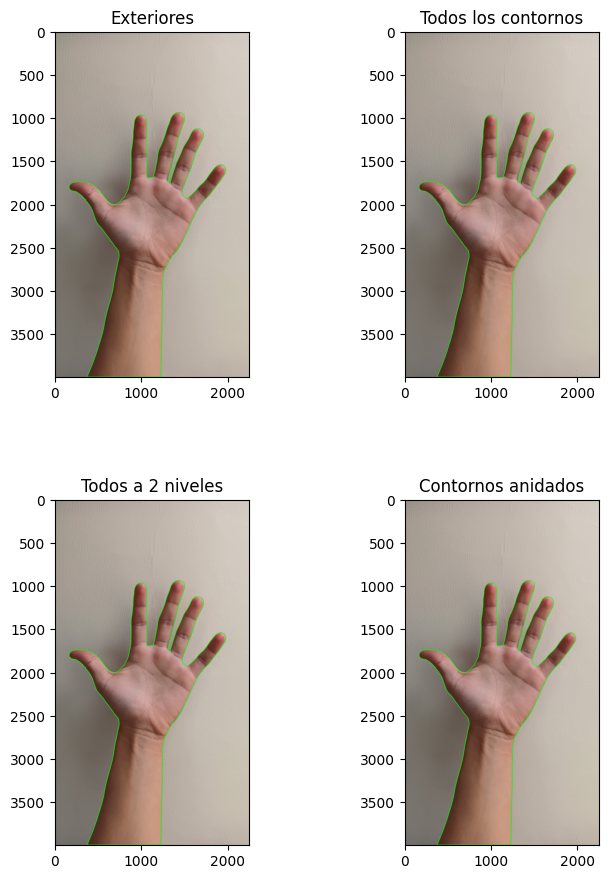

In [314]:
Exteriores,_ = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )
Lista,_ = cv2.findContours(otsu, cv2.RETR_LIST , cv2.CHAIN_APPROX_SIMPLE)
Jerar,_ = cv2.findContours(otsu, cv2.RETR_CCOMP , cv2.CHAIN_APPROX_TC89_L1)
Tree,_ = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS)
c1 = cv2.drawContours(Img1.copy(), Exteriores, -1, (0, 255, 0), 5)
c2 = cv2.drawContours(Img1.copy(), Lista, -1, (255, 0, 0), 5)
c3 = cv2.drawContours(Img1.copy(), Jerar, -1, (0, 0, 255), 5)
c4 = cv2.drawContours(Img1.copy(), Tree, -1, (0, 255, 0), 5)
plt.figure(1)
plt.subplot(2,2,1), plt.imshow(c1, cmap=plt.cm.gray), plt.title('Exteriores')
plt.subplot(2,2,2), plt.imshow(c1, cmap=plt.cm.gray), plt.title('Todos los contornos')
plt.subplot(2,2,3), plt.imshow(c1, cmap=plt.cm.gray), plt.title('Todos a 2 niveles')
plt.subplot(2,2,4), plt.imshow(c1, cmap=plt.cm.gray), plt.title('Contornos anidados')
# plt.subplot(1,3,2), plt.imshow(Est_1, cmap=plt.cm.gray), plt.title('Elemento estructurante')
# plt.subplot(1,3,3), plt.imshow(result[0], cmap=plt.cm.gray), plt.title('Resultado')
plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)
plt.show()

Debido al filtro HSV, los contornos internos no son visibles. Ya que el filtro utilizado (HSV) solo otorga el contorno de la mano sin sus partes interiores. Se observa un desempeño adecuado en los 4 modos de evaluación, sin embargo en los contornos en lista y anidados se denota una mayor nitidez.

**b. Transformada de Hough**

In [ ]:
Img1  = cv2.imread('Images/Indoor_P.jpg',1)
Img1 = Img1[:,:,::-1]
hsv = cv2.cvtColor(Img1, cv2.COLOR_RGB2HSV)
blur = cv2.GaussianBlur(hsv, (5,5), 0)
img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
tre, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

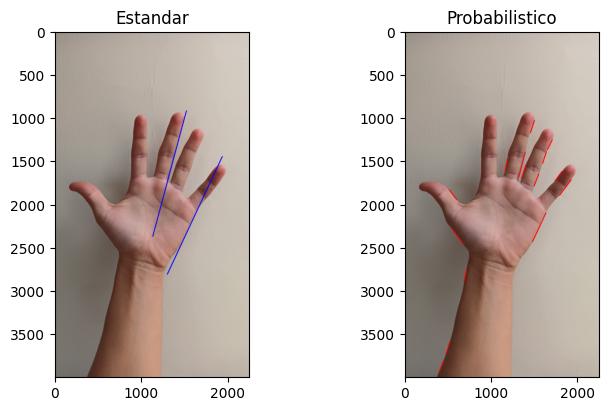

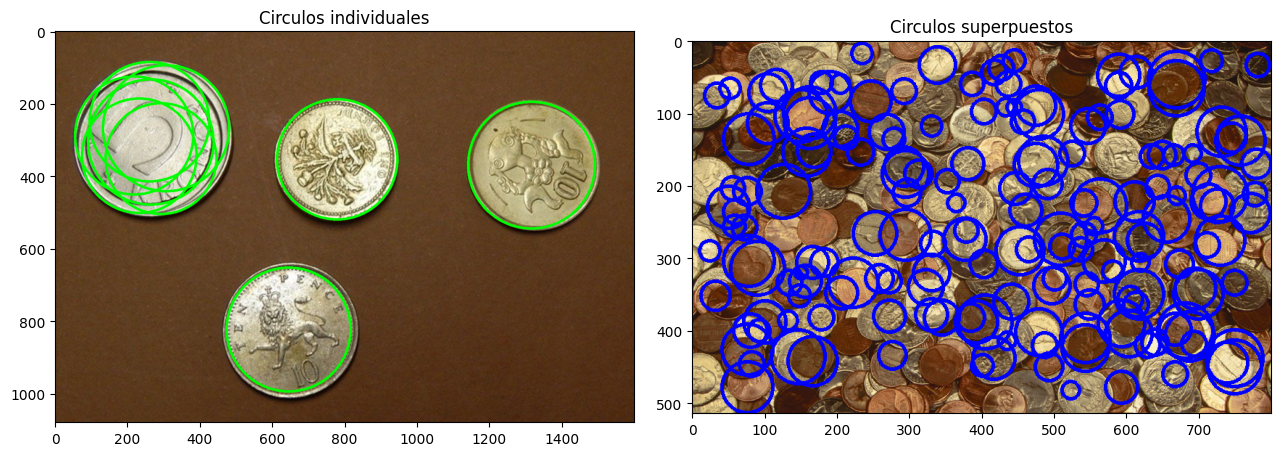

In [329]:
bordes = cv2.Canny(Img1, 50, 150, apertureSize=3)

lineaSTD = cv2.HoughLines(bordes, 1, np.pi/180, 200)

imgSTD = Img1.copy()
if lineaSTD is not None:
    for linea in lineaSTD:
        rho, theta = linea[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 2000 * (-b))
        y1 = int(y0 + 2000 * (a))
        x2 = int(x0 + 500 * (-b))
        y2 = int(y0 + 500 * (a))
        cv2.line(imgSTD, (x1, y1), (x2, y2), (0, 0, 255), 10)

lineasPro = cv2.HoughLinesP(bordes, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

imgP = Img1.copy()

if lineasPro is not None:
    for linea in lineasPro:
        x1, y1, x2, y2 = linea[0]
        cv2.line(imgP, (x1, y1), (x2, y2), (255, 0, 0), 10)

Img2 = cv2.imread('Images/Monedas.jpeg', 1)
Img2 = Img2[:,:,::-1]
bordesC = cv2.Canny(Img2, 100, 200)
circulos = cv2.HoughCircles(bordesC, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=150, maxRadius=180)

ImgC1 = Img2.copy()
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for circulo in circulos[0, :]:
        centro = (circulo[0], circulo[1])
        radio = circulo[2]
        cv2.circle(ImgC1, centro, radio, (0, 255, 0), 5)

Img3 = cv2.imread('Images/Monedas.jpg', 1)
Img3 = Img3[:,:,::-1]
bordesC = cv2.Canny(Img3, 100, 200)
circulos = cv2.HoughCircles(bordesC, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=50, param2=30, minRadius=0, maxRadius=40)

ImgC2 = Img3.copy()
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for circulo in circulos[0, :]:
        centro = (circulo[0], circulo[1])
        radio = circulo[2]
        cv2.circle(ImgC2, centro, radio, (0, 0, 255), 3)

plt.figure(1)
plt.subplot(2,2,1), plt.imshow(imgSTD, cmap=plt.cm.gray), plt.title('Estandar')
plt.subplot(2,2,2), plt.imshow(imgP, cmap=plt.cm.gray), plt.title('Probabilistico')
plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=0.95, hspace=0, wspace=0.8)

plt.figure(2)
plt.subplot(1,2,1), plt.imshow(ImgC1, cmap=plt.cm.gray), plt.title('Circulos individuales')
plt.subplot(1,2,2), plt.imshow(ImgC2), plt.title('Circulos superpuestos')
plt.subplots_adjust(top=2, bottom=0.05, left=0.10, right=2, hspace=0, wspace=0.1)


El metodo estandar para la detección de lineas conserva en mayor instancia lineas con longitudes considerables, a diferencia del probabilistico que permite una variación en los parametros, detectando así rectas con menor tamaño.

El metodo de detección de circulos es más efectivo en circulo con figuras no circuncritas, ya que este puede detectar curvas internas como circulos falso. Es poco efectivo en ambientes de circulos superpuestos como se observa en el segundo ejemplo.

**c. Crecimiento de regiones**

In [ ]:
altura, ancho = Img1.shape[:2]
mascara = np.zeros((altura + 2, ancho + 2), np.uint8)

# Definir el color de relleno (en BGR)
color_relleno = (255, 255, 255)

# Realizar el relleno a partir del punto (100, 100)
cv2.floodFill(imagen, mascara, (100, 100), color_relleno)

**d. Algoritmo de Watershed**